<a href="https://colab.research.google.com/github/dongmeisun/dongmeisun/blob/main/AWOL_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving awos.csv to awos.csv


In [ ]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded[ 'awos.csv' ]))
df.head()
#df = pd.DataFrame(data)

,PatientMrn,age,asa,proc_risk,world,orient,admission,him
0,543498,70,3,2,0,0,2,0
1,2925689,57,2,2,0,0,2,0
2,2925689,57,2,2,0,0,2,0
3,2265743,86,3,2,0,0,2,1
4,1182578,70,2,2,0,0,2,0


In [ ]:
# normalise the age
df['age1'] = StandardScaler().fit_transform(np.array(df['age']).reshape(-1, 1))


In [ ]:
# Separating the target variable and other
#https://olympus.mygreatlearning.com/courses/87616/files/7024596?module_item_id=3448405

Y = df.him

X = df.drop(['him','PatientMrn','age'], axis = 1)

In [ ]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)
# describes info about train and test set
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Number transactions x_train dataset:  (23534, 6)
Number transactions y_train dataset:  (23534,)
Number transactions x_test dataset:  (10087, 6)
Number transactions y_test dataset:  (10087,)


In [ ]:
# Creating metric function

def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['No Delirium', 'Delirium'], yticklabels = ['No Delirium', 'Delirium'])
    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [ ]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier

    predictors: independent variables

    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall

    precision = precision_score(target, pred, average = 'macro')              # To compute precision

    acc = accuracy_score(target, pred)                                 # To compute accuracy score


    # Creating a dataframe of metrics

    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },

        index = [0],
    )

    return df_perf


In [ ]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.009, 1: 0.991}, random_state = 1)


In [ ]:
# Fitting decision tree model
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.009, 1: 0.991}, random_state=1)

In [ ]:
DecisionTreeClassifier(class_weight={0: 0.009, 1: 0.991}, random_state=1)

DecisionTreeClassifier(class_weight={0: 0.009, 1: 0.991}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      0.84      0.91     23322
           1       0.05      0.95      0.10       212

    accuracy                           0.84     23534
   macro avg       0.53      0.89      0.50     23534
weighted avg       0.99      0.84      0.91     23534



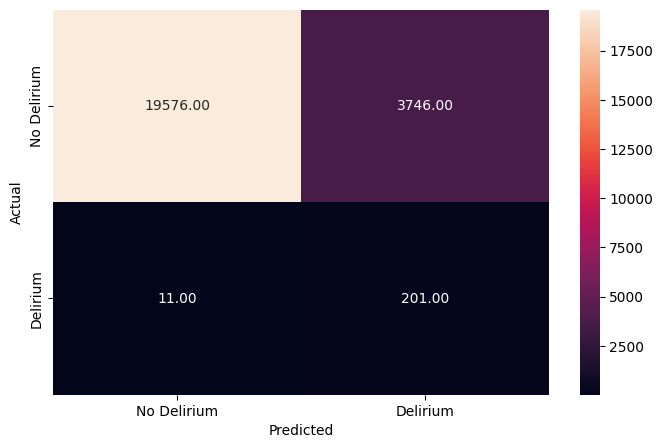

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      9996
           1       0.03      0.62      0.07        91

    accuracy                           0.84     10087
   macro avg       0.52      0.73      0.49     10087
weighted avg       0.99      0.84      0.91     10087



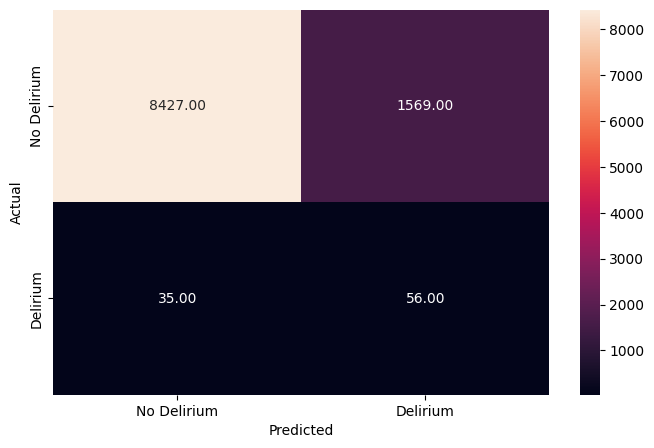

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [ ]:
dtree_test = model_performance_classification(dt,x_test,y_test)
dtree_test

,Precision,Recall,Accuracy
0,0.515163,0.729211,0.840983


<Axes: ylabel='Importance'>

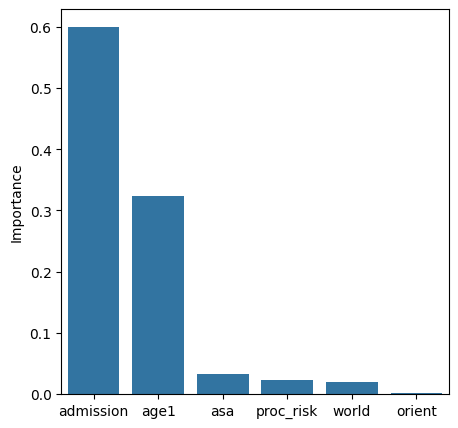

In [ ]:
# Plot the feature importance

importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (5, 5))

sns.barplot(importance_df.Importance)

In [ ]:
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.009, 1: 0.991}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.009, 1: 0.991}, max_depth=3,
                       min_samples_leaf=5, random_state=1)

In [ ]:
DecisionTreeClassifier(class_weight={0: 0.009, 1: 0.991}, max_depth=3,
                       min_samples_leaf=5, random_state=1)

DecisionTreeClassifier(class_weight={0: 0.009, 1: 0.991}, max_depth=3,
                       min_samples_leaf=5, random_state=1)

              precision    recall  f1-score   support

           0       1.00      0.77      0.87     23322
           1       0.04      0.92      0.07       212

    accuracy                           0.78     23534
   macro avg       0.52      0.85      0.47     23534
weighted avg       0.99      0.78      0.87     23534



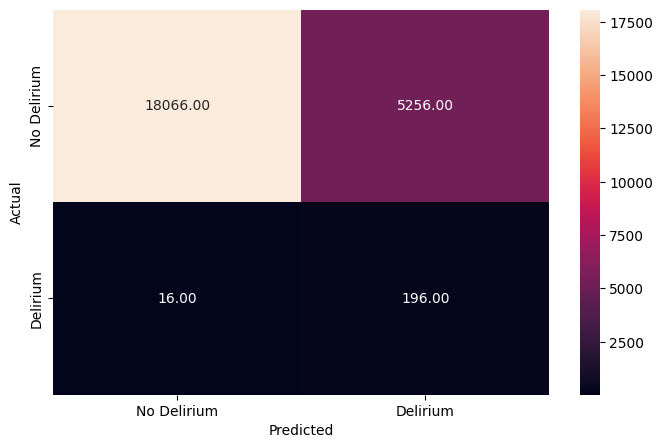

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(x_train)

metrics_score(y_train, y_train_pred_dt)


              precision    recall  f1-score   support

           0       1.00      0.78      0.87      9996
           1       0.04      0.92      0.07        91

    accuracy                           0.78     10087
   macro avg       0.52      0.85      0.47     10087
weighted avg       0.99      0.78      0.87     10087



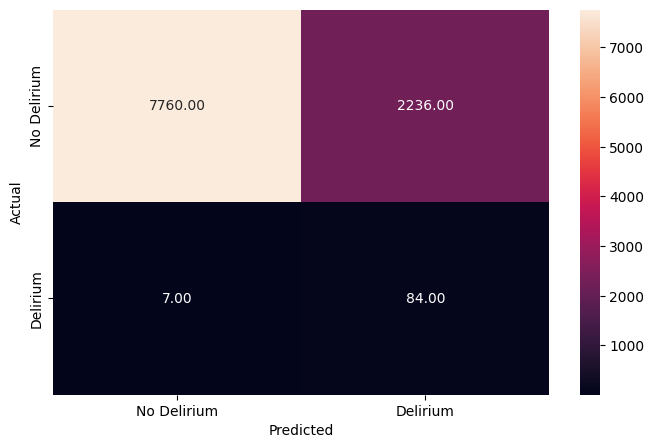

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [ ]:
dtree_tuned_test = model_performance_classification(dtree_estimator,x_test,y_test)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.517653,0.849694,0.777635


<Axes: ylabel='Importance'>

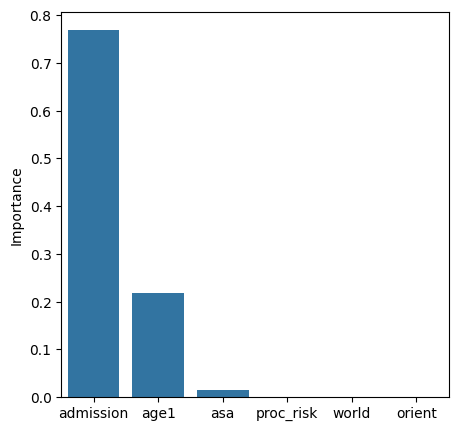

In [ ]:
importances = dtree_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (5, 5))

sns.barplot(importance_df.Importance)

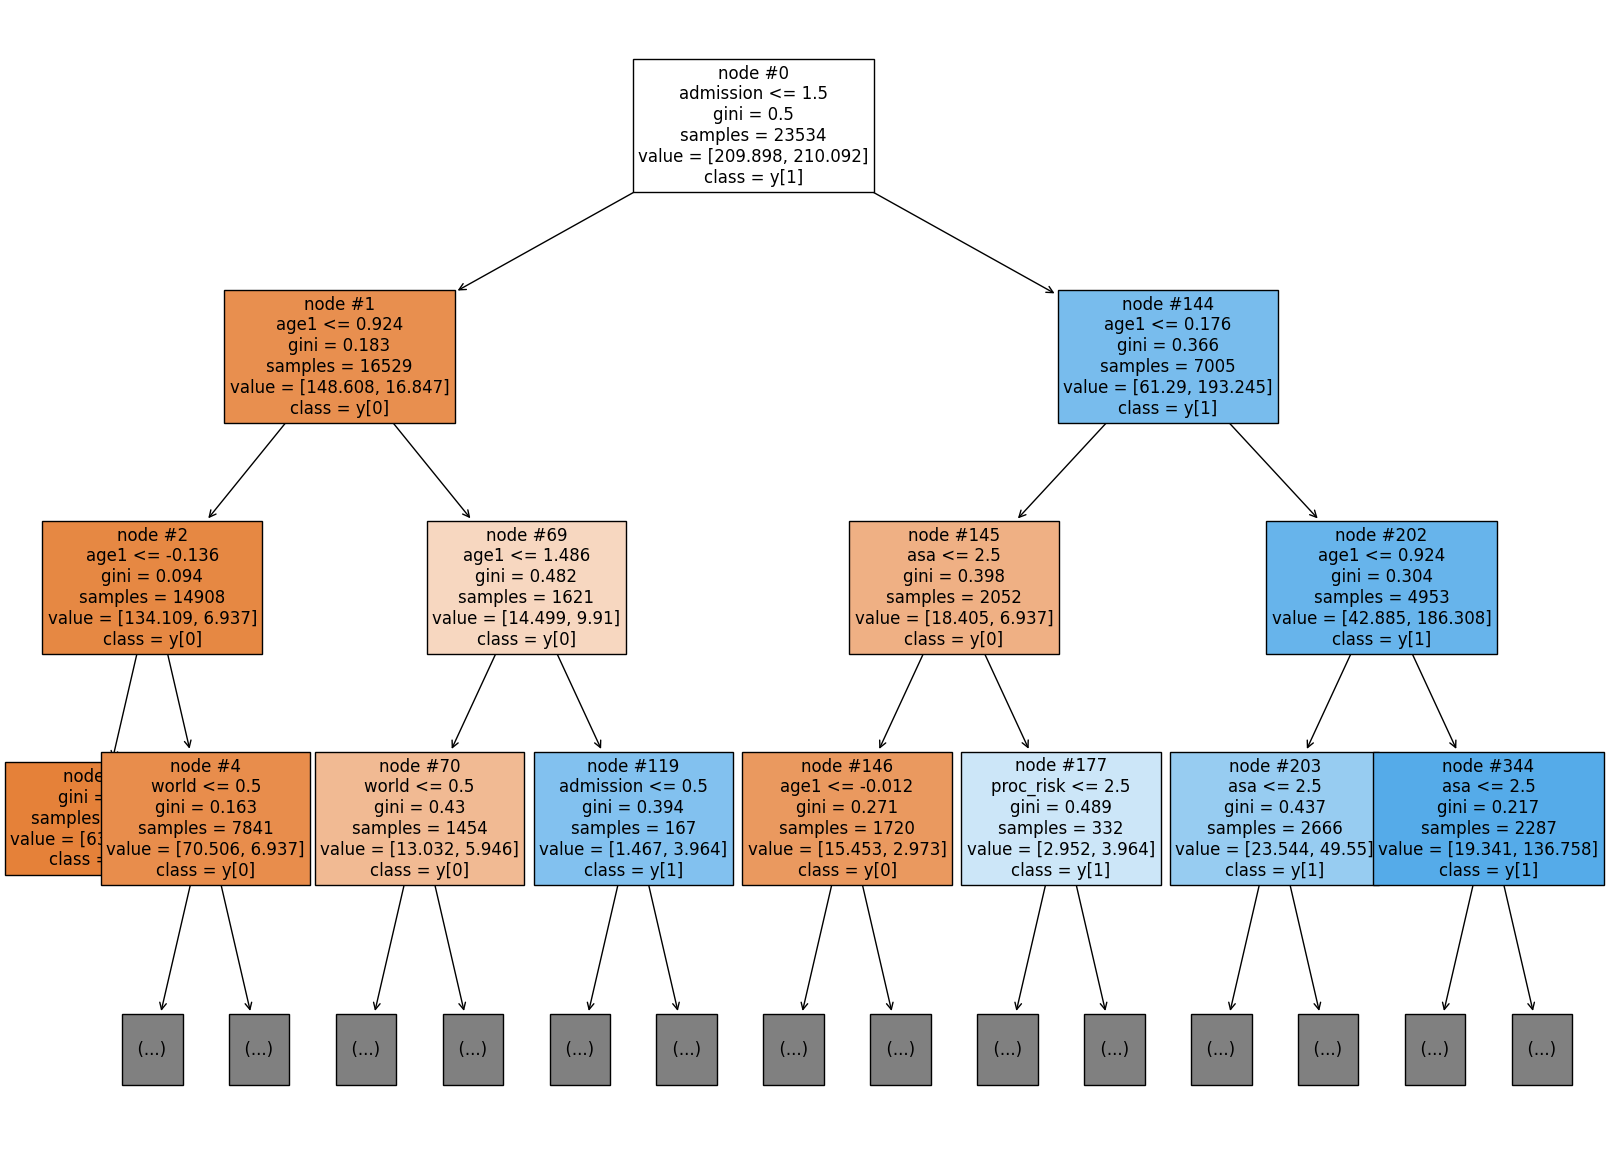

In [ ]:
features = list(X.columns)

plt.figure(figsize = (20, 15))

tree.plot_tree(dt, max_depth = 3, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.009, 1: 0.991}, random_state = 1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.009, 1: 0.991}, random_state=1)

In [ ]:
RandomForestClassifier(class_weight={0: 0.009, 1: 0.991}, random_state=1)

RandomForestClassifier(class_weight={0: 0.009, 1: 0.991}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      0.88      0.94     23322
           1       0.07      0.88      0.12       212

    accuracy                           0.88     23534
   macro avg       0.53      0.88      0.53     23534
weighted avg       0.99      0.88      0.93     23534



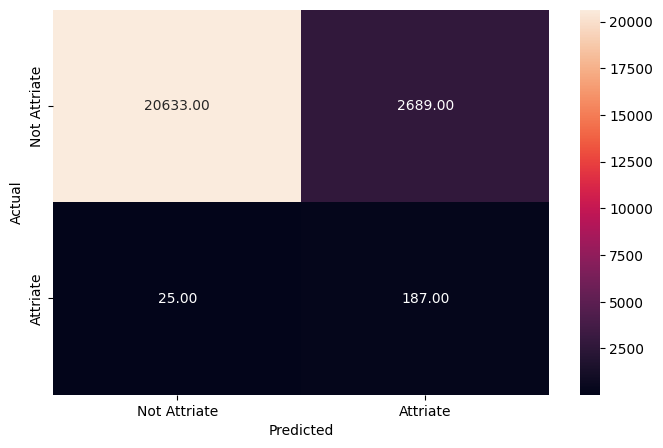

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      9996
           1       0.04      0.48      0.07        91

    accuracy                           0.88     10087
   macro avg       0.52      0.69      0.50     10087
weighted avg       0.99      0.88      0.93     10087



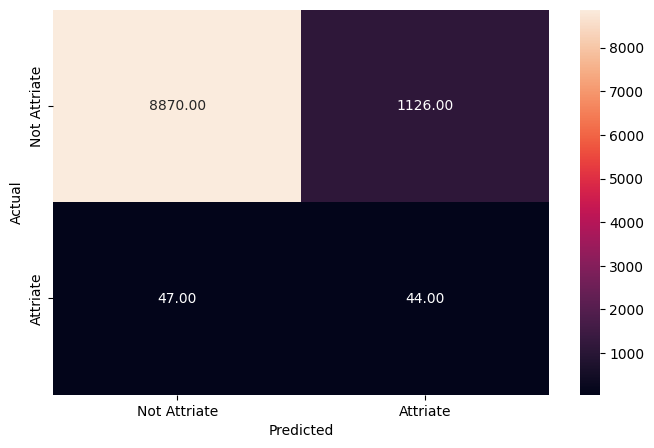

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

In [ ]:
rf_estimator_test = model_performance_classification(rf_estimator,x_test,y_test)
rf_estimator_test

,Precision,Recall,Accuracy
0,0.516168,0.685436,0.883712


<Axes: ylabel='Importance'>

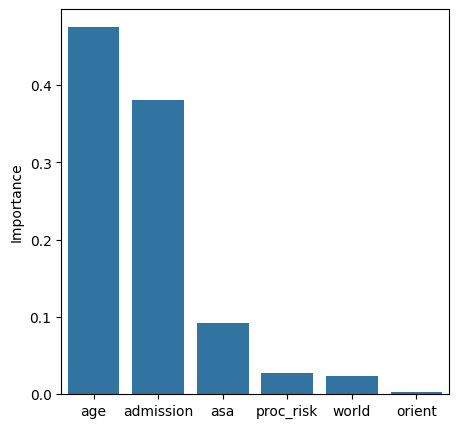

In [ ]:
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (5, 5))

sns.barplot(importance_df.Importance)

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.009, 1: 0.991}, random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.009, 1: 0.991}, max_features=0.7,
                       min_samples_leaf=3, n_estimators=500, random_state=1)

In [ ]:
RandomForestClassifier(class_weight={0: 0.009, 1: 0.991}, max_features=0.7,
                       min_samples_leaf=3, n_estimators=500, random_state=1)

RandomForestClassifier(class_weight={0: 0.009, 1: 0.991}, max_features=0.7,
                       min_samples_leaf=3, n_estimators=500, random_state=1)

              precision    recall  f1-score   support

           0       1.00      0.86      0.93     23322
           1       0.06      0.91      0.11       212

    accuracy                           0.86     23534
   macro avg       0.53      0.89      0.52     23534
weighted avg       0.99      0.86      0.92     23534



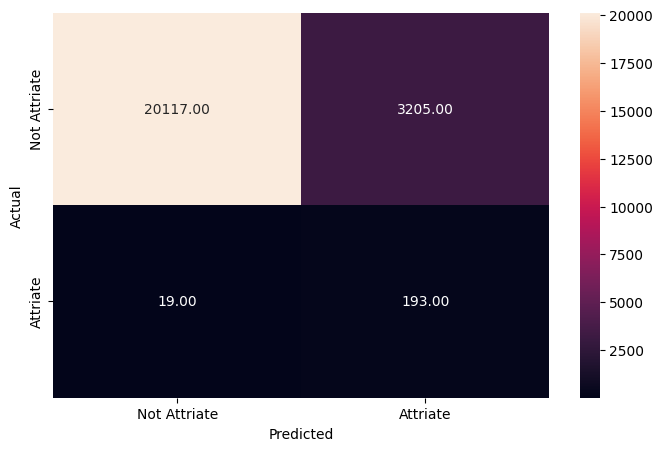

In [ ]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      9996
           1       0.04      0.56      0.07        91

    accuracy                           0.86     10087
   macro avg       0.52      0.71      0.50     10087
weighted avg       0.99      0.86      0.92     10087



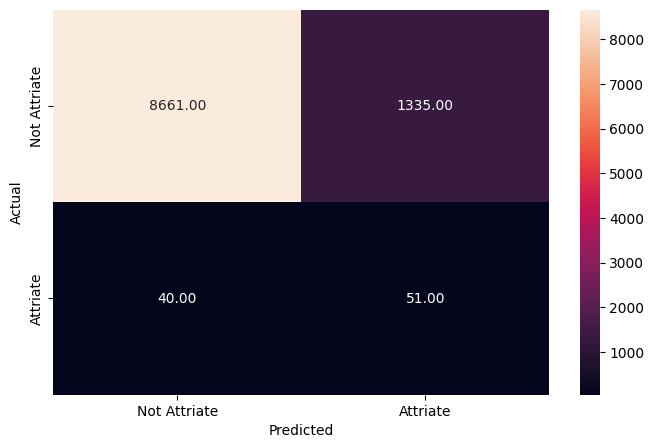

In [ ]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)

metrics_score(y_test, y_pred_test_rf_tuned)

In [ ]:
rf_estimator_tuned_test = model_performance_classification(rf_estimator_tuned, x_test, y_test)
rf_estimator_tuned_test

,Precision,Recall,Accuracy
0,0.5161,0.713443,0.863686


<Axes: ylabel='Importance'>

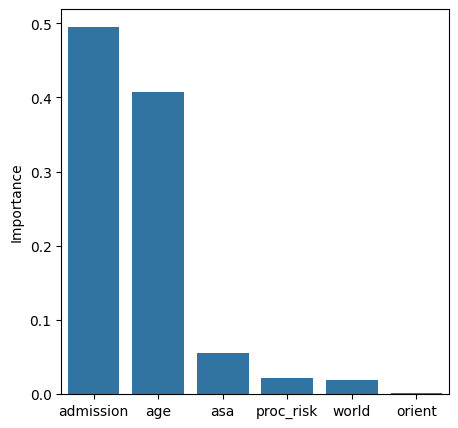

In [ ]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (5, 5))

sns.barplot(importance_df.Importance)

In [ ]:
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

NameError: name 'X_train' is not defined

In [ ]:
# Installing the xgboost library using the 'pip' command.
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 6.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [ ]:
# Importing the AdaBoostClassifier and GradientBoostingClassifier [Boosting]
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Importing the XGBClassifier from the xgboost library
from xgboost import XGBClassifier

In [ ]:
# Adaboost Classifier
adaboost_model = AdaBoostClassifier(random_state = 1)

# Fitting the model
adaboost_model.fit(x_train, y_train)

# Model Performance on the test data
adaboost_model_perf_test = model_performance_classification(adaboost_model,x_test,y_test)


adaboost_model_perf_test

,Precision,Recall,Accuracy
0,0.495488,0.4999,0.99078


In [ ]:
# Gradient Boost Classifier
gbc = GradientBoostingClassifier(random_state = 1)

# Fitting the model
gbc.fit(x_train, y_train)

# Model Performance on the test data
gbc_perf_test = model_performance_classification(gbc, x_test, y_test)

gbc_perf_test

,Precision,Recall,Accuracy
0,0.638442,0.510739,0.990681


In [ ]:
# XGBoost Classifier
xgb = XGBClassifier(random_state = 1, eval_metric = 'logloss')

# Fitting the model
xgb.fit(x_train,y_train)

# Model Performance on the test data
xgb_perf_test = model_performance_classification(xgb,x_test,y_test)

xgb_perf_test

,Precision,Recall,Accuracy
0,0.620585,0.510689,0.990582


In [ ]:
models_test_comp_df = pd.concat(

    [
    dtree_test.T, dtree_tuned_test.T,rf_estimator_test.T,
    rf_estimator_tuned_test.T, adaboost_model_perf_test.T,
    gbc_perf_test.T, xgb_perf_test.T
    ],

    axis = 1,
)

models_test_comp_df.columns = [
    "Decision Tree classifier",
    "Tuned Decision Tree classifier",
    "Random Forest classifier",
    "Tuned Random Forest classifier",
    "Adaboost classifier",
    "Gradientboost classifier",
    "XGBoost classifier"
]

print("Test performance comparison:")


Test performance comparison:


In [ ]:
models_test_comp_df

,Decision Tree classifier,Tuned Decision Tree classifier,Random Forest classifier,Tuned Random Forest classifier,Adaboost classifier,Gradientboost classifier,XGBoost classifier
Precision,0.515163,0.517653,0.516168,0.516100,0.495488,0.638442,0.620585
Recall,0.729211,0.849694,0.685436,0.713443,0.499900,0.510739,0.510689
Accuracy,0.840983,0.777635,0.883712,0.863686,0.990780,0.990681,0.990582
